In [4]:
import numpy as np
import sys
import pickle
import random
import pandas
import seaborn as sns

from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE

In [5]:
# PART 1 - load data

global traces

with open('../ipt_traces.npy', 'rb') as f:
    traces = pickle.load(f)

In [6]:
def process_traces(class_id):
    
    X = traces[class_id]

    lengths = [len(trace) for trace in X]
    mean = np.mean(lengths)
    std = np.std(lengths)

    # remove outliers
    X = [trace for trace in X if abs(len(trace) - mean) < 1.5*std]

    # 2 methods for making the traces all the same length
    lengths = [len(trace) for trace in X]
    max_len = max(lengths)
    min_len = min(lengths)
    X_maxlen = np.empty(shape=(4500, max_len))
    X_minlen = np.empty(shape=(4500, min_len))

    for i, trace in enumerate(X):
        test = np.zeros(max_len - len(trace))
        X_maxlen[i] = np.append(trace, np.zeros(max_len - len(trace)))
        X_minlen[i] = trace[:min_len]
    
    return X_maxlen, X_minlen

/Users/michaelwrana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/michaelwrana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/var/folders/ww/7kn8t7y91gv3dzhg4tzjhq4m0000gn/T/ipykernel_43462/2064410086.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=clustering,palette=["red", "green", "blue", "black", "orange"], alpha=0.5)


<AxesSubplot: >

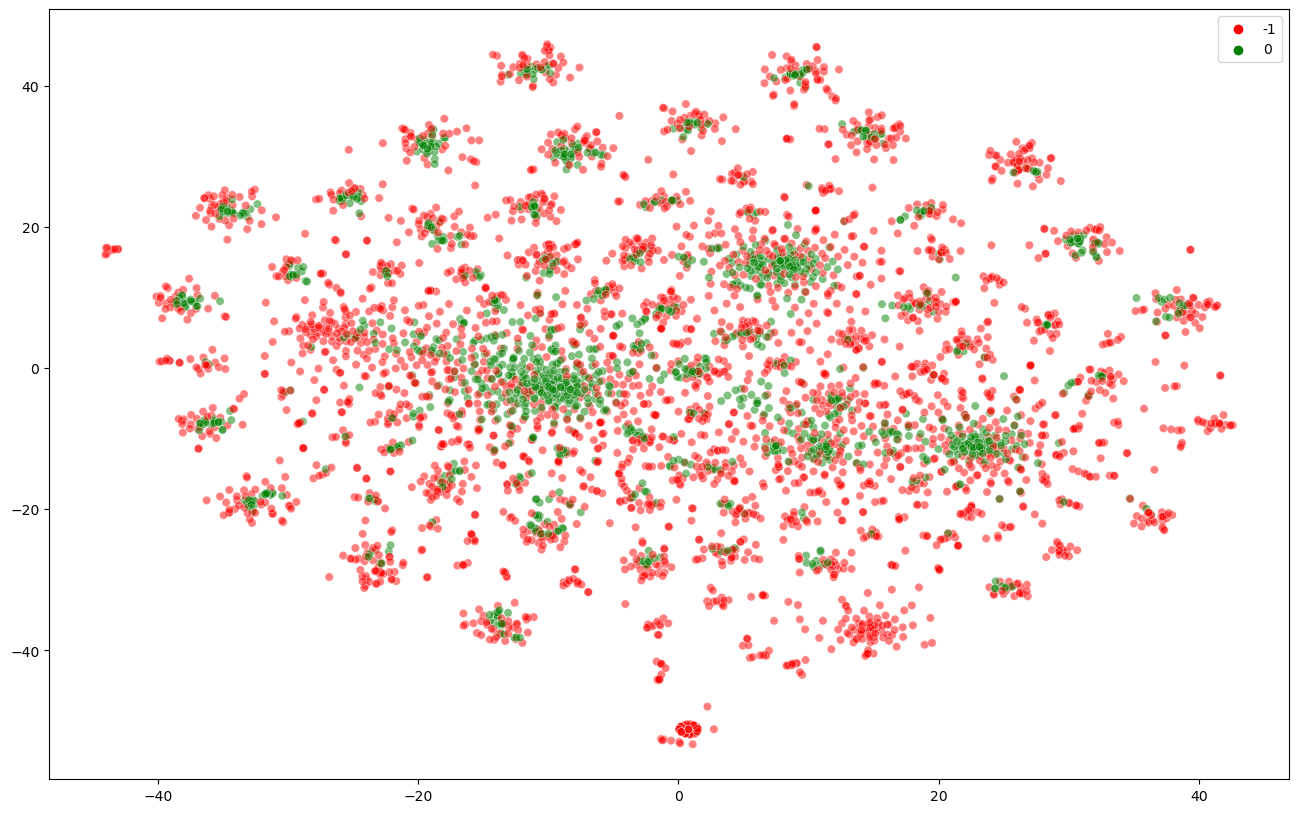

In [38]:
X_minlen, X_maxlen = process_traces(2)
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(X_minlen)
dbscan = DBSCAN(eps=0.8, min_samples=100)
clustering = dbscan.fit_predict(X_minlen)
plt.figure(figsize=(16,10))
sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=clustering,palette=["red", "green", "blue", "black", "orange"], alpha=0.5)

/Users/michaelwrana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/michaelwrana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: >

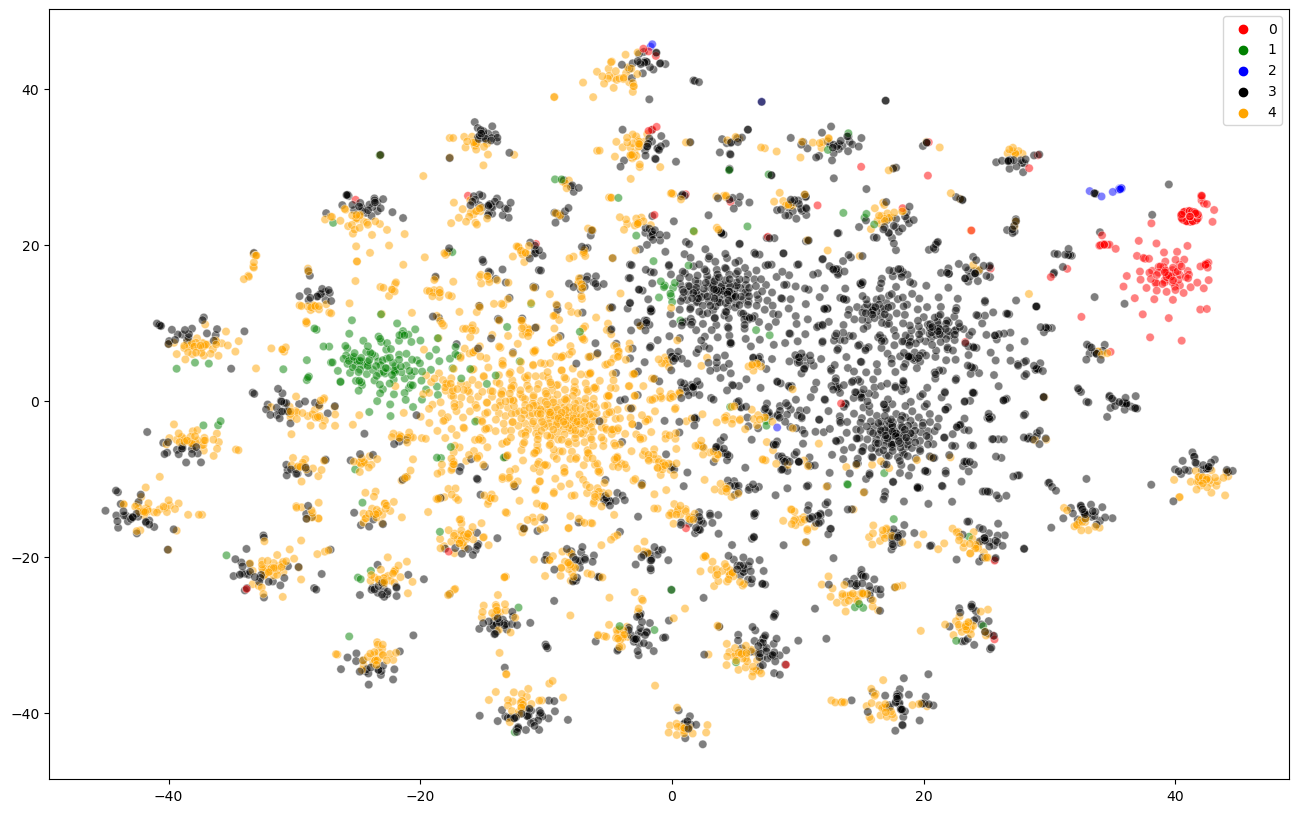

In [33]:
X_minlen, X_maxlen = process_traces(2)
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(X_minlen)
kmeans = KMeans(n_clusters=5)
clustering = kmeans.fit_predict(X_minlen)
plt.figure(figsize=(16,10))
sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=clustering,palette=["red", "green", "blue", "black", "orange"], alpha=0.5)

In [ ]:
#     db = DBSCAN(eps=1, min_samples=10).fit(X_minlen)
#     labels = db.labels_

#     # Number of clusters in labels, ignoring noise if present.
#     n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#     n_noise_ = list(labels).count(-1)

#     if (n_clusters_ > 1):
#         print("Clusters found using min length for id "+ str(key) + ": %d" % n_clusters_)

#     db = DBSCAN(eps=1, min_samples=10).fit(X_maxlen)
#     labels = db.labels_

#     # Number of clusters in labels, ignoring noise if present.
#     n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#     n_noise_ = list(labels).count(-1)

#     if (n_clusters_ > 1):
#         print("Clusters found using max length for id "+ str(key) + ": %d" % n_clusters_)

In [99]:
X = traces[0]

print(len(X))

lengths = [len(trace) for trace in X]
mean = np.mean(lengths)
std = np.std(lengths)

# remove outliers
X = [trace for trace in X if abs(len(trace) - mean) < 1.5*std]

print(len(X))

# 2 methods for making the traces all the same length
lengths = [len(trace) for trace in X]
max_len = max(lengths)
min_len = min(lengths)
X_maxlen = np.empty(shape=(4500, max_len))
X_minlen = np.empty(shape=(4500, min_len))

for i, trace in enumerate(X):
    test = np.zeros(max_len - len(trace))
    X_maxlen[i] = np.append(trace, np.zeros(max_len - len(trace)))
    X_minlen[i] = trace[:min_len]

4500
4193


In [93]:
db = DBSCAN(eps=20, min_samples=500).fit(X_minlen)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 307


In [ ]:
global traces

with open('../ipt_traces.npy', 'rb') as f:
    traces = pickle.load(f)